In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm

## Single evolution - parallel computations


In [10]:
df = pd.read_csv("POOL_single_evo_parallel_computation.csv")
df.head()

,n_particles,parallel_time,serial_time,Pool,ThreadPool
0,100,0.036713,0.001929,True,False
0,350,0.086851,0.025964,True,False
0,600,0.099155,0.068446,True,False
0,850,0.094215,0.132999,True,False
0,1100,0.105034,0.182183,True,False


In [11]:
std_group = df.groupby("n_particles")[["parallel_time","serial_time"]].agg(["mean","std"])
std_group.head()

parallel_time           serial_time          
                     mean       std        mean       std
n_particles                                              
100              0.043843  0.007840    0.002662  0.000512
350              0.132589  0.054529    0.042379  0.019549
600              0.133774  0.051375    0.103620  0.013670
850              0.133858  0.029624    0.183317  0.026746
1100             0.170684  0.039825    0.290276  0.041934

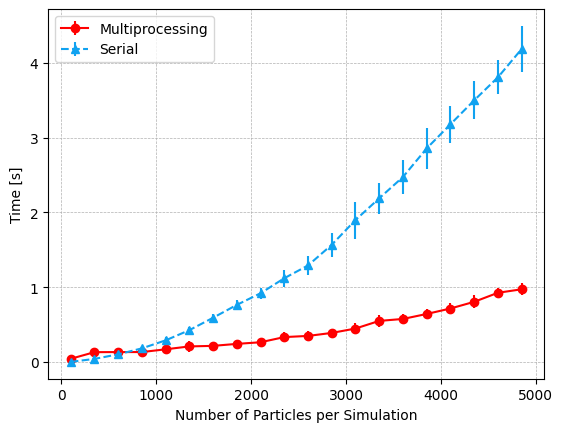

In [12]:
fig, ax = plt.subplots()

colors = [cm.rainbow(i) for i in np.linspace(0, 1, 10)]

i = 0 
# each group has n_particles fixed (that is its "name")
n_particles = std_group["parallel_time"]["mean"].keys().get_level_values(0).values


ax.errorbar(n_particles, std_group["parallel_time"].values[:,0], yerr=std_group["parallel_time"].values[:,1], marker="o", label="Multiprocessing", c=colors[9], linestyle='-')
ax.errorbar(n_particles, std_group["serial_time"].values[:,0], yerr=std_group["serial_time"].values[:,1], marker="^", label="Serial", c=colors[2], linestyle='--')

# Set labels and title
ax.set_xlabel('Number of Particles per Simulation')
ax.set_ylabel('Time [s]')
#ax.set_title(f'Number of Parallel simulations = {name}')
ax.grid(linestyle='--', linewidth=0.5)


ax.legend()

#plt.savefig("single_evo_parallel_computation.pdf")
# Show the plot
plt.show()


In [13]:
df2 = pd.read_csv("THREADPOOL_single_evo_parallel_computation.csv")
df2.head()

,index,n_particles,time_single_parallel,time_full_parallel,time_single_serial,time_full_serial#THREADPOOL
0,0,100,0.017018,0.091020,0.001844,0.009937
1,0,350,0.120332,0.838969,0.071478,0.254380
2,0,600,0.080287,1.110898,0.153066,0.571797
3,0,850,0.114568,1.708559,0.254788,1.215167
4,0,1100,0.162016,2.118511,0.380721,2.139384


In [14]:
std_group2 = df2.groupby("n_particles")[["time_single_parallel","time_single_serial"]].agg(["mean","std"])
std_group2.head()

time_single_parallel           time_single_serial          
                            mean       std               mean       std
n_particles                                                            
100                     0.015698  0.002579           0.002614  0.000497
350                     0.143685  0.033383           0.145008  0.045231
600                     0.197616  0.077922           0.223156  0.029216
850                     0.172576  0.044453           0.308032  0.028725
1100                    0.223178  0.047148           0.422697  0.025634

Questo plot puoi paccarlo, l'importante è il confronto tra Pool e ThreadPool

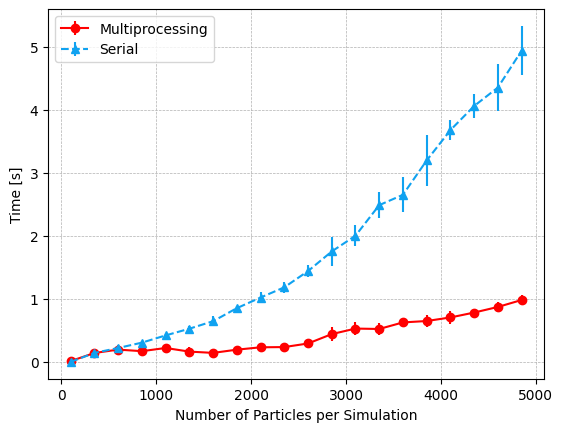

In [15]:
fig, ax = plt.subplots()

colors = [cm.rainbow(i) for i in np.linspace(0, 1, 10)]

i = 0 
# each group has n_particles fixed (that is its "name")
n_particles2 = std_group2["time_single_parallel"]["mean"].keys().get_level_values(0).values


ax.errorbar(n_particles2, std_group2["time_single_parallel"].values[:,0], yerr=std_group2["time_single_parallel"].values[:,1], marker="o", label="Multiprocessing", c=colors[9], linestyle='-')
ax.errorbar(n_particles2, std_group2["time_single_serial"].values[:,0], yerr=std_group2["time_single_serial"].values[:,1], marker="^", label="Serial", c=colors[2], linestyle='--')

# Set labels and title
ax.set_xlabel('Number of Particles per Simulation')
ax.set_ylabel('Time [s]')
#ax.set_title(f'Number of Parallel simulations = {name}')
ax.grid(linestyle='--', linewidth=0.5)


ax.legend()

#plt.savefig("single_evo_parallel_computation.pdf")
# Show the plot
plt.show()


### Questo carino
#### Pool vs Threadpool: they're equal

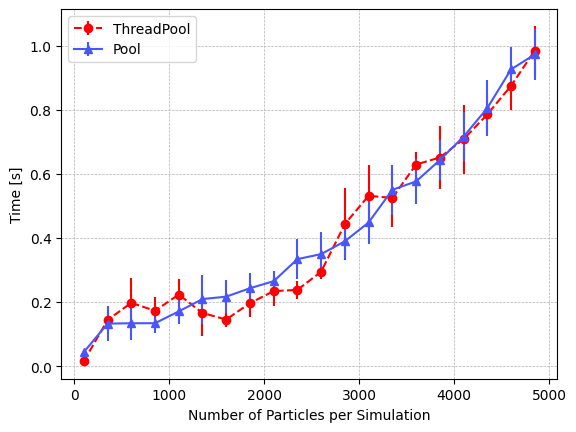

In [16]:
fig, ax = plt.subplots()

colors = [cm.rainbow(i) for i in np.linspace(0, 1, 10)]

i = 0 
# each group has n_particles fixed (that is its "name")
n_particles2 = std_group2["time_single_parallel"]["mean"].keys().get_level_values(0).values


ax.errorbar(n_particles2, std_group2["time_single_parallel"].values[:,0], yerr=std_group2["time_single_parallel"].values[:,1], marker="o", label="ThreadPool", c=colors[9], linestyle='--')
ax.errorbar(n_particles, std_group["parallel_time"].values[:,0], yerr=std_group["parallel_time"].values[:,1], marker="^", label="Pool", c=colors[1], linestyle='-')

# Set labels and title
ax.set_xlabel('Number of Particles per Simulation')
ax.set_ylabel('Time [s]')
#ax.set_title(f'Number of Parallel simulations = {name}')
ax.grid(linestyle='--', linewidth=0.5)


ax.legend()

plt.savefig("Pool_vs_ThreadPool.pdf")
# Show the plot
plt.show()
